In [1]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

#import pandas_profiling

from sklearn.metrics import mean_squared_error

%matplotlib inline

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:  
а) зависимость цены на недвижимость в конкретном регионе от времени,  
- ценными для интерпретации м.б.: сезонность цен аренды загородной недвижимости или изменения цен на недвижимость (аренды и покупки) из года в год
  
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,  
- если скорость во время одного полета - наверное на поиск аномалий в случае обнаружения поломки по результатам полета, хотя вряд ли этот показатель как единичный. Хоть как-то можно интерпретировать скорость полета в разные дни - возможно и будут закономерности и зависимости - например от времени суток или от сезонов - движение воздушных масс. Особенно в совокупности с избранием различных воздушных коридоров.
  
в) количество отказов компьютера,  
- формально , наверное, можно выстроить ряд. Правда, в реальности не представляю, что это за компьютер такой, который при этом сохранит работоспособность и какая ценность.
    
г) число обращений в поликлинику по району,  
- сезонные показатели, в течение дня. Можно одновременно с признаками вида обращений. Например, как самое тривиальное - для планирования работы регистратуры и уборки помещений.
  
д) координаты автобуса при движении по маршруту,  
- именно координаты - вряд ли можно как-то интерпретировать. мне в голову ничего не приходит. Я вижу только после преобоазования. Например, в пройденное расстояние от начальной точки. 
Но у меня уже у самой возник вопрос, что это за вид данных - координаты? Это ведь числовые интервальные данные, как температура, или как? Как их самих обрабатывать/использовать до преобразования в другой признак?

е) координаты фигуры нарушителя в файле видеофиксации охранной системы  
- тут, честно говоря, не поняла, что имеется ввиду под координатами. Координаты относительно чего? На экране есть координаты?


**2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.**

#### Загрузка данных

"D:\AI\Machine learning\DUQ_hourly.csv"

In [2]:
electr = pd.read_csv('D:/AI/Machine learning/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

**visualizing series**

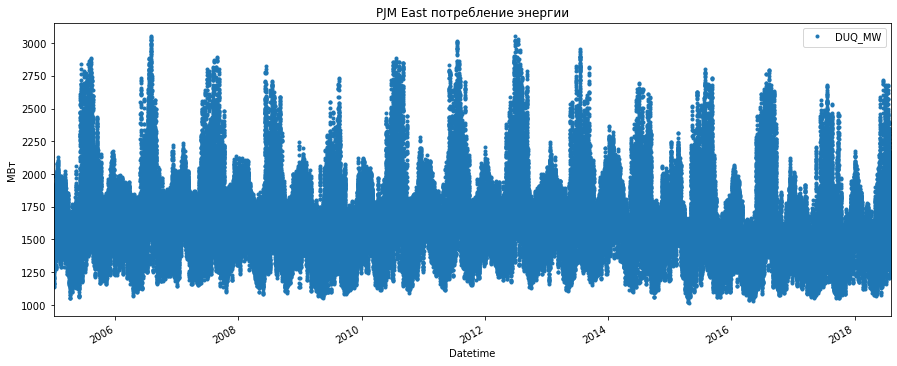

In [3]:
electr.plot(style='.', figsize=(15, 6), title='PJM East потребление энергии')
plt.ylabel('МВт');

**data has cycles**

#### Посмотрим на статистику

In [4]:
electr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


**Поскольку данные лежат в диапазоне от 1014МВт до 3054МВт, то очевидно, что точность представления float64 избыточна. Перейдем к целым.**

In [5]:
electr['DUQ_MW'] = electr['DUQ_MW'].astype('int64')

In [6]:
electr.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458
2005-12-31 02:00:00,1377
2005-12-31 03:00:00,1351
2005-12-31 04:00:00,1336
2005-12-31 05:00:00,1356


In [7]:
#!pip install pandas_profiling

In [8]:
#import pandas_profiling


**an error occured while installing package. Needs ckecking. Previous time with some other package it was connected with the version of Python. Had to install the older version of Python**

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\python37\\Lib\\site-packages\\_yaml.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

In [9]:
#pandas_profiling.ProfileReport(electr)

**adding date**

In [10]:
electr['date'] = electr.index

In [11]:
#checking date repeats; finding number of dates
if len(electr['date'].value_counts())==electr['date'].nunique():
    print(electr['date'].nunique())

119064


In [12]:
# проверим пропуски
electr['DUQ_MW'].isnull()

Datetime
2005-12-31 01:00:00    False
2005-12-31 02:00:00    False
2005-12-31 03:00:00    False
2005-12-31 04:00:00    False
2005-12-31 05:00:00    False
                       ...  
2018-01-01 20:00:00    False
2018-01-01 21:00:00    False
2018-01-01 22:00:00    False
2018-01-01 23:00:00    False
2018-01-02 00:00:00    False
Name: DUQ_MW, Length: 119068, dtype: bool

**Пропусков нет, но есть дни, когда были зафиксированы показания потребления электроэнергии под одним индексом дважды.**

In [13]:
electr.index.value_counts().nlargest()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

In [14]:
day_H=electr['2017-11-01 00:00:00':'2017-11-10 23:00:00'].index.day

In [15]:
day_H.value_counts()

5     25
10    24
9     24
8     24
7     24
6     24
4     24
3     24
2     24
1     24
Name: Datetime, dtype: int64

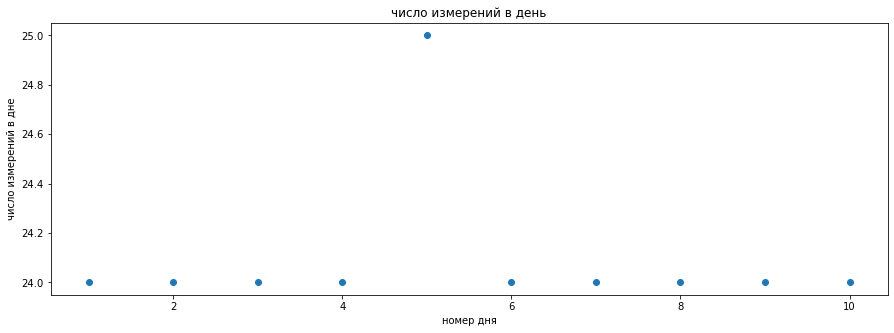

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

**При переходе на зимнее время в первое воскресенье ноября продолжительность дня составляет 25 часов, и показания снимаются 25 раз за день. Наверно будет некорректно удалить одно из показаний под одинаковым индексом, так как сами показания разные, поэтому заменим на их среднее значение.**

In [17]:
electr.loc[electr['date'] == '2017-11-05 02:00:00', 'DUQ_MW'] = electr.loc[
    electr['date'] == '2017-11-05 02:00:00', 'DUQ_MW'].mean()

In [18]:
electr.loc[electr['date'] == '2014-11-02 02:00:00', 'DUQ_MW'] = electr.loc[
    electr['date'] == '2014-11-02 02:00:00', 'DUQ_MW'].mean()

In [19]:
electr.loc[electr['date'] == '2015-11-01 02:00:00', 'DUQ_MW'] = electr.loc[
    electr['date'] == '2015-11-01 02:00:00', 'DUQ_MW'].mean()

In [20]:
electr.loc[electr['date'] == '2016-11-06 02:00:00', 'DUQ_MW'] = electr.loc[
    electr['date'] == '2016-11-06 02:00:00', 'DUQ_MW'].mean()

In [21]:
electr.loc[electr['date'] == '2007-07-15 10:00:00', 'DUQ_MW'] = electr.loc[
    electr['date'] == '2007-07-15 10:00:00', 'DUQ_MW'].mean()

In [22]:
electr.drop_duplicates(inplace=True)

In [23]:
electr.shape

(119064, 2)

**days with summer time shift**

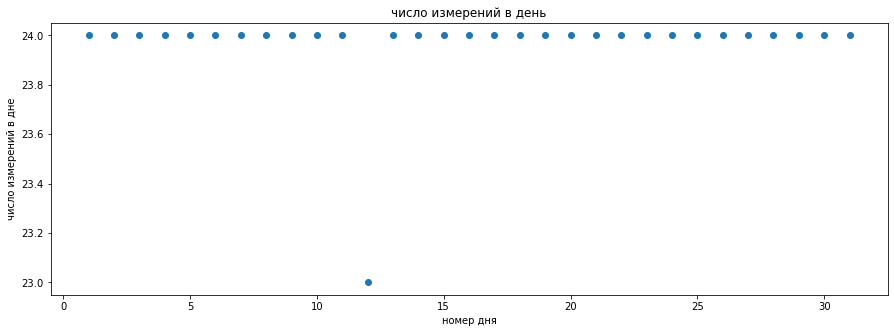

In [24]:
day_H=electr['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

plt.figure(figsize=(15, 5))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [25]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

12    23
Name: Datetime, dtype: int64

**12 марта 2017 года пропущены показания от 3-го часа.**

In [26]:
electr['2017-03-12 01:00:00':'2017-03-12 06:00:00'].index

DatetimeIndex(['2017-03-12 01:00:00', '2017-03-12 02:00:00',
               '2017-03-12 04:00:00', '2017-03-12 05:00:00',
               '2017-03-12 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

**Найдем дни с 23-ми записями**

In [27]:
day_H=electr['2018-03-01 00:00:00':'2018-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2018 = Day_count[Day_count != 24].index
d2018

Int64Index([11], dtype='int64')

In [28]:
day_H=electr['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 = Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [29]:
day_H=electr['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 = Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [30]:
day_H=electr['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [31]:
day_H=electr['2007-03-01 00:00:00':'2007-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2007 = Day_count[Day_count < 24].index
d2007

Int64Index([11], dtype='int64')

In [32]:
day_H=electr['2008-03-01 00:00:00':'2008-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2008 = Day_count[Day_count < 24].index
d2008

Int64Index([9], dtype='int64')

#### Мы можем добавить пропущенные данные интерполяцией

**3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.**

"D:\AI\Machine learning\brent 2010-2019.xlsx"

In [33]:
brent = pd.read_excel('D:/AI/Machine learning/brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

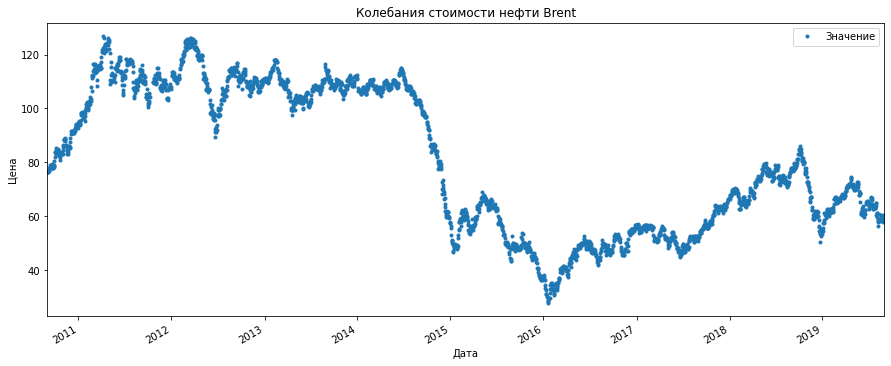

In [34]:
brent.plot(style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Цена');

#### Добавим признаков на основе даты и времени

In [35]:
brent['date'] = brent.index

In [36]:
brent['year'] = brent['date'].dt.year
brent['month'] = brent['date'].dt.month
brent['dayofmonth'] = brent['date'].dt.day
brent['quarter'] = brent['date'].dt.quarter
brent['dayofyear'] = brent['date'].dt.dayofyear
brent['weekofyear'] = brent['date'].dt.weekofyear
brent['dayofweek'] = brent['date'].dt.dayofweek
brent['hour'] = brent['date'].dt.hour

In [37]:
brent.head()

,Значение,date,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,,
2019-09-01,58.84,2019-09-01,2019,9,1,3,244,35,6,0
2019-08-30,59.19,2019-08-30,2019,8,30,3,242,35,4,0
2019-08-29,60.37,2019-08-29,2019,8,29,3,241,35,3,0
2019-08-28,59.84,2019-08-28,2019,8,28,3,240,35,2,0
2019-08-27,59.59,2019-08-27,2019,8,27,3,239,35,1,0


In [38]:
brent.drop(columns='date', inplace=True)
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2019-09-01,58.84,2019,9,1,3,244,35,6,0
2019-08-30,59.19,2019,8,30,3,242,35,4,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0
2019-08-27,59.59,2019,8,27,3,239,35,1,0


**Средние значения стоимости нефти по неделям**

In [39]:
brent.resample("W").mean().head(3)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2010-09-05,76.616000,2010.0,9.0,3.000000,3.0,246.000000,35.0,4.000000,0.0
2010-09-12,77.673333,2010.0,9.0,8.500000,3.0,251.500000,36.0,2.500000,0.0
2010-09-19,78.693333,2010.0,9.0,15.666667,3.0,258.666667,37.0,2.666667,0.0


**Средние значения стоимости нефти по месяцам**

In [40]:
brent.resample("M").mean().head(3)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.0
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.0
2010-11-30,86.178077,2010.0,11.0,15.346154,4.0,319.346154,45.692308,2.500000,0.0


**4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.**

**Средняя цена по неделям**

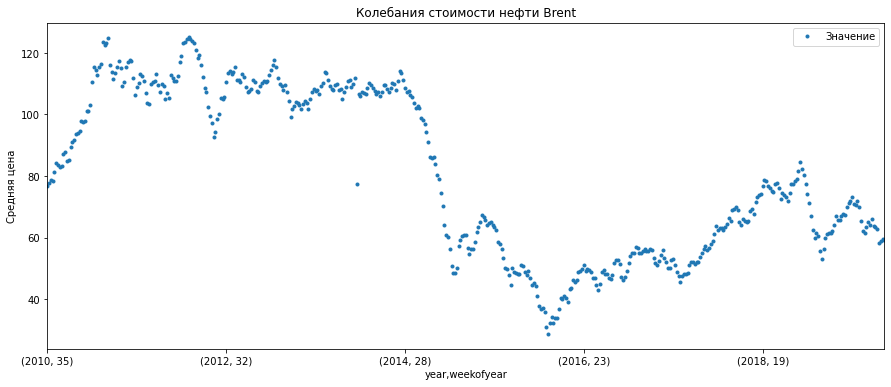

In [41]:
brent.groupby(['year', 'weekofyear']).agg({"Значение": "mean"}).plot(
    style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

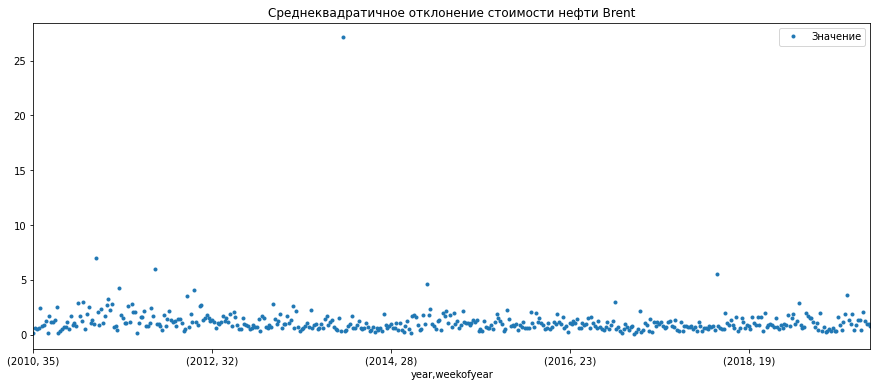

In [42]:
brent.groupby(['year', 'weekofyear']).agg({"Значение": "std"}).plot(
    style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');

**Средняя цена по месяцам**

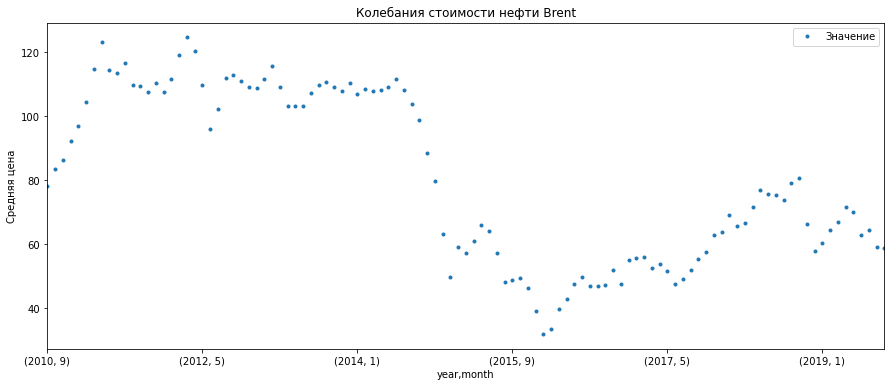

In [43]:
brent.groupby(['year', 'month']).agg({"Значение": "mean"}).plot(
    style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

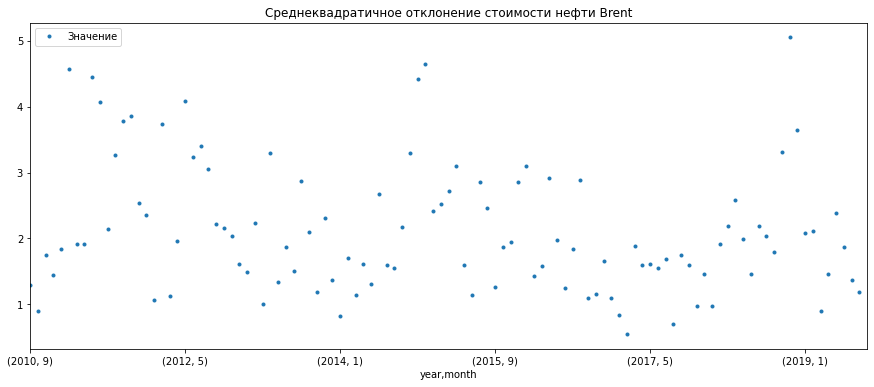

In [44]:
brent.groupby(['year', 'month']).agg({"Значение": "std"}).plot(
    style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');

**Среднегодичные цены**

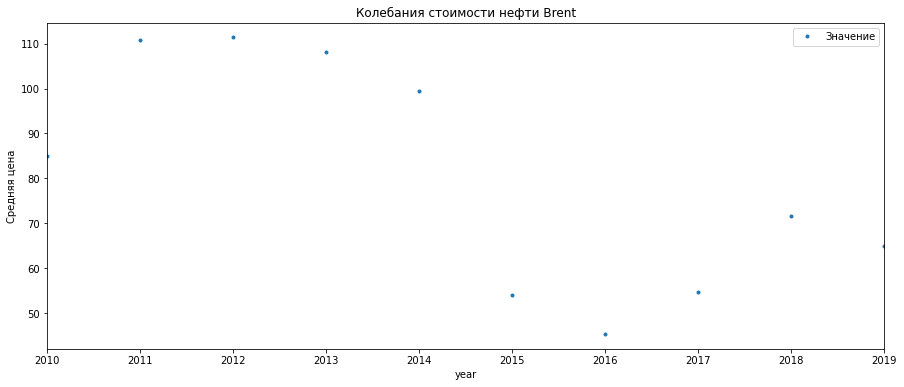

In [45]:
brent.groupby(['year']).agg({"Значение": "mean"}).plot(
    style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

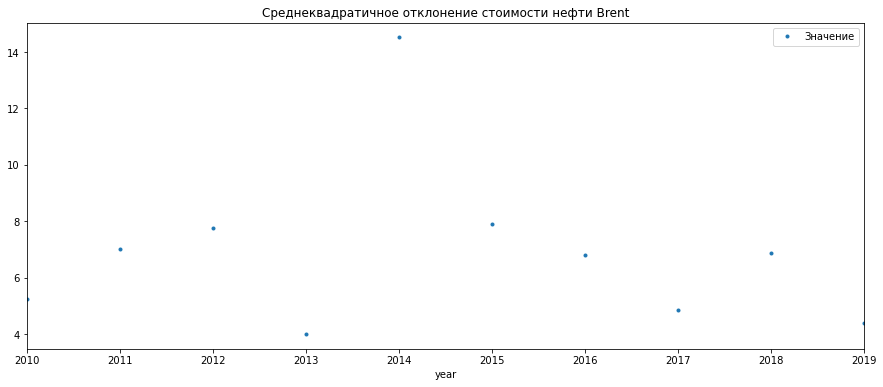

In [46]:
brent.groupby(['year']).agg({"Значение": "std"}).plot(
    style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');

**5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

Месячные колебания цены больше недельных, которые, в свою очередь, больше дневных.